In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

In [44]:
wine = pd.read_csv('winequality-red.csv',sep=';')

In [45]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
wine['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [49]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

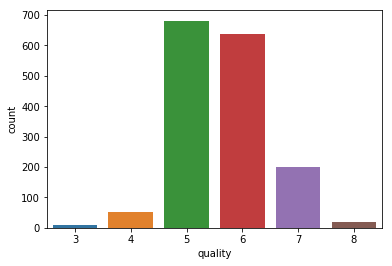

In [51]:
sns.countplot(x='quality', data=wine)

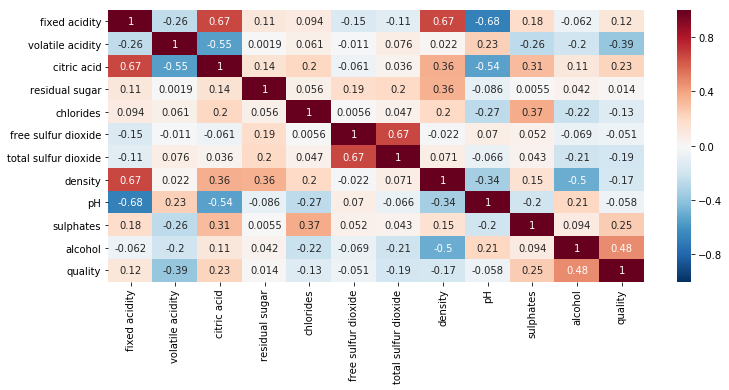

In [52]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

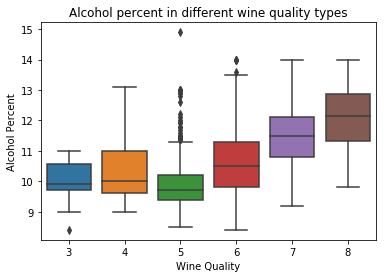

In [53]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

In [54]:
def isTasty(quality):
    if quality >= 6:
        return 1
    else:
        return 0

In [55]:
wine['tasty'] = wine['quality'].apply(isTasty)

In [56]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [57]:
wine['tasty'].value_counts()

1    855
0    744
Name: tasty, dtype: int64

In [59]:
data = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = wine['tasty']

In [60]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.4,random_state=123)


In [61]:
simpleTree = DecisionTreeClassifier(max_depth=5)
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
rfTree = RandomForestClassifier(max_depth=5)
rfTree.fit(data_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))
rfTreePerformance = precision_recall_fscore_support(target_test,rfTree.predict(data_test))

In [64]:
simpleTreePerformance

(array([0.75925926, 0.70810811]),
 array([0.65495208, 0.80122324]),
 array([0.70325901, 0.7517934 ]),
 array([313, 327], dtype=int64))

In [65]:
rfTreePerformance

(array([0.76241135, 0.72625698]),
 array([0.68690096, 0.79510703]),
 array([0.72268908, 0.75912409]),
 array([313, 327], dtype=int64))

In [66]:
print('Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:'+'\n')
for treeMethod in [simpleTreePerformance,rfTreePerformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:

Precision:  [0.75925926 0.70810811]
Recall:  [0.65495208 0.80122324]
Fscore:  [0.70325901 0.7517934 ]
Support:  [313 327] 

Precision:  [0.76241135 0.72625698]
Recall:  [0.68690096 0.79510703]
Fscore:  [0.72268908 0.75912409]
Support:  [313 327] 



In [67]:
print('Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(target_test,simpleTree.predict(data_test)),'\n')
print('Random Forest:\n',confusion_matrix(target_test,rfTree.predict(data_test)))

Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[205 108]
 [ 65 262]] 

Random Forest:
 [[215  98]
 [ 67 260]]
